## week 2, task 3
В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

In [1]:
import numpy as np
# import pandas as pd
# import math
# from scipy.stats import chisquare
# from statsmodels.stats.descriptivestats import sign_test

# from statsmodels.sandbox.stats.multicomp import multipletests 

# import scipy
# import scipy as sc

# from statsmodels.stats.weightstats import *
# import pandas as pd

# import statsmodels.formula.api as smf
# import statsmodels.stats.api as sms

# import statsmodels.stats.multitest as smm

# import matplotlib.pyplot as plt
# %pylab inline

In [3]:
n = 50
n1 = 34
n2 = 16
p1 = 10.0/34
p2 = 4.0/16
print p1-p2

0.0441176470588


In [15]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [16]:
alpha = 4.4/100
z = scipy.stats.norm.ppf(1 - alpha / 2.)
  
left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ 34 + p2 * (1 - p2)/ 16)
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ 34 + p2 * (1 - p2)/ 16)
    
print (left_boundary, right_boundary)

(-0.22478421033096152, 0.3130195044486086)


In [18]:
P = float(p1*n1 + p2*n2) / (n1 + n2)
    
z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
print 'greater', 1 - scipy.stats.norm.cdf(z_stat)

greater 0.372930458725


### week 2, task 6,7

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Посчитайте достигаемый уровень значимости, округлите до 4 знаков после десятичной точки. Отвергается ли на уровне значимости 0.05 нулевая гипотеза?

In [28]:
import math
mu = 525
sigma = 100

n1 = 100
mu1 = 541.4
mu2 = 541.5

p_val_1 = 1 - stats.norm.cdf((mu1 - mu)/(sigma/math.sqrt(n1)))
p_val_2 = 1 - stats.norm.cdf((mu2 - mu)/(sigma/math.sqrt(n1)))

print p_val_1, p_val_2

0.0505025834741 0.0494714680336


In [2]:
import pandas as pd
df = pd.read_csv('banknotes.csv', delimiter='\t')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [4]:
# # Split the Learning Set
from sklearn.cross_validation import train_test_split
target = df.real
df.drop(['real'], axis = 1, inplace = True)
X_fit, X_eval, y_fit, y_eval= train_test_split(
    df, target, test_size=0.25, random_state=1
)

In [5]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
logreg = linear_model.LogisticRegression()
mod1 = logreg.fit(X_fit[['X1', 'X2', 'X3']], y_fit)
y1 = mod1.predict(X_eval[['X1', 'X2', 'X3']])

mod2 = logreg.fit(X_fit[['X4', 'X5', 'X6']], y_fit)
y2 = mod2.predict(X_eval[['X4', 'X5', 'X6']])

p1 = accuracy_score(y_eval, y1)
p2 = accuracy_score(y_eval, y2)

print p1, p2

0.8 0.98


In [6]:
delta1 = y_eval == y1
delta2 = y_eval == y2

In [9]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

print proportions_diff_z_test(proportions_diff_z_stat_rel(delta1, delta2))
print proportions_diff_confint_rel(delta2, delta1)

0.00329693845555
(0.059945206279614305, 0.30005479372038568)


In [71]:
print y1.size, X_fit.shape

50 (150, 6)


In [19]:
long_life = np.array([49,58,75,110,112,132,151,276,281,362])
mu = 200
print stats.wilcoxon(long_life - mu), long_life.mean()

WilcoxonResult(statistic=17.0, pvalue=0.28450269791120752) 160.6


In [27]:
trees_no_cut = np.array([22,22,15,13,19,19,18,20,21,13,13,15])
trees_with_cut = np.array([17,18,18,15,12,4,14,15,10])

print stats.mannwhitneyu(trees_no_cut, trees_with_cut)

MannwhitneyuResult(statistic=27.0, pvalue=0.029004992720873729)


In [49]:
df = pd.read_csv('challenger.csv', delimiter='\t')
print df.head()

no_incident = df[df.Incident == 0].Temperature.as_matrix()
with_incident = df[df.Incident == 1].Temperature.as_matrix()

  Unnamed: 0  Temperature  Incident
0   Apr12.81         18.9         0
1   Nov12.81         21.1         1
2   Mar22.82         20.6         0
3   Nov11.82         20.0         0
4   Apr04.83         19.4         0


In [83]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [85]:
np.random.seed(0)

#get_bootstrap_samples(no_incident, 1000)

no_incident_scores = map(np.mean, get_bootstrap_samples(no_incident, 1000))
with_incident_scores = map(np.mean, get_bootstrap_samples(with_incident, 1000))

print 'no_incident_scores ', sum(no_incident_scores) / float(len(no_incident_scores))
print 'with_incident_scores ', sum(with_incident_scores) / float(len(with_incident_scores))

delta_median_scores = map(lambda x: x[0] - x[1], zip(no_incident_scores, with_incident_scores))

print 'delta ', sum(delta_median_scores) / float(len(delta_median_scores))

print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)


no_incident_scores  22.26614375
with_incident_scores  17.6334
delta  4.63274375
95% confidence interval for the difference between medians [ 1.42299107  7.93861607]


На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Чтобы получить такое же значение, как мы:

установите random seed = 0;
возьмите 10000 перестановок.

  Unnamed: 0  Temperature  Incident
0   Apr12.81         18.9         0
1   Nov12.81         21.1         1
2   Mar22.82         20.6         0
3   Nov11.82         20.0         0
4   Apr04.83         19.4         0


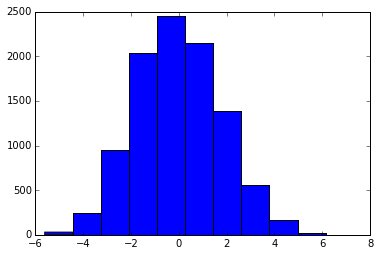

In [93]:
df = pd.read_csv('challenger.csv', delimiter='\t')
print df.head()

no_incident = df[df.Incident == 0].Temperature.as_matrix()
with_incident = df[df.Incident == 1].Temperature.as_matrix()

def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr
pylab.hist(permutation_zero_dist_ind(no_incident, with_incident, max_combinations = 10000))
pylab.show()

In [96]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

np.random.seed(0)
print "p-value: %f" % permutation_test(no_incident, with_incident, max_permutations = 10000)

p-value: 0.007000


In [47]:
df = pd.read_csv('water.csv', delimiter='\t')
print df.head()

  location        town  mortality  hardness
0    South        Bath       1247       105
1    North  Birkenhead       1668        17
2    South  Birmingham       1466         5
3    North   Blackburn       1800        14
4    North   Blackpool       1609        18


In [48]:
#1 -0.6548
df.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [49]:
#2 -0.6317
df.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [9]:
df_north = df[df.location == 'North']
df_south = df[df.location == 'South']

In [50]:
df_north.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [51]:
df_south.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
#3 min  = -0.3686

In [18]:
#4 корреляция метьюса = 0.109
def mcc(a,b,c,d):
    return (a*d-b*c)/(math.sqrt((a+b)*(a+c)*(b+d)*(c+d)))
print mcc(239, 515, 203, 718)

0.109002374587


In [3]:
p_man1 = 239./(239+515)
p_man2 = 1 - p_man1
p_woman1 = 203./(203+718)
p_woman2 = 1 - p_woman1

p = [[p_man1, p_man2], [p_woman1, p_woman2]]
num1 = [[239,515],[203, 718]]
num2 = [[239,203],[515, 718]]
print scipy.stats.chi2_contingency(p,0), scipy.stats.chi2_contingency(num1),scipy.stats.chi2_contingency(num2)

(0.023726780783717979, 0.87758214001964774, 1, array([[ 0.26869436,  0.73130564],
       [ 0.26869436,  0.73130564]])) (19.407530788543038, 1.0558987006638725e-05, 1, array([[ 198.96597015,  555.03402985],
       [ 243.03402985,  677.96597015]])) (19.407530788543038, 1.0558987006638725e-05, 1, array([[ 198.96597015,  243.03402985],
       [ 555.03402985,  677.96597015]]))


Returns:	
chi2 : float
The test statistic.
p : float
The p-value of the test
dof : int
Degrees of freedom
expected : ndarray, same shape as observed
The expected frequencies, based on the marginal sums of the table.

In [12]:
#6 0.0952
alpha = 0.05
z = scipy.stats.norm.ppf(1 - alpha / 2.)

p1 = p_man1
p2 = p_woman1

n1 = 239+515
n2 = 203+718

left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
print (left_boundary, right_boundary)

(0.053905233215813156, 0.13922183141523897)


In [5]:
P = float(p1*n1 + p2*n2) / (n1 + n2)
z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
print 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))

8.15345308958e-06


In [6]:
# Не доволен	Более или менее	Доволен
# Не очень счастлив	197	111	33
# Достаточно счастлив	382	685	331
# Очень счастлив	110	342	333
pd_happiness = [[197,111,33],[382,685,331],[110,342,333]]
scipy.stats.chi2_contingency(pd_happiness)

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[  93.08597464,  153.74722662,   94.16679873],
        [ 381.6251981 ,  630.318542  ,  386.0562599 ],
        [ 214.28882726,  353.93423138,  216.77694136]]))

In [10]:
print math.sqrt((293.68311039689746)/((n1+n2)*(3-1)))

0.296085460836


In [64]:
df = pd.read_csv('Aucs.csv', delimiter='\t')
df

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898
5,iris,0.936,0.931,0.916,0.931
6,liver disorders,0.661,0.668,0.609,0.685
7,lung cancer,0.583,0.583,0.563,0.625
8,lymphography,0.775,0.838,0.866,0.875
9,mushroom,1.000,1.000,1.000,1.000


In [65]:
df['C4.5'].as_matrix()

array([ 0.763,  0.599,  0.954,  0.628,  0.882,  0.936,  0.661,  0.583,
        0.775,  1.   ,  0.94 ,  0.619,  0.972,  0.957])

In [68]:
#2 C4.5 C4.5+m+cf
#3 2
#4 m

corr_data = []

for i, lhs_column in enumerate(df.columns):
    for j, rhs_column in enumerate(df.columns):
        if i >= j or (i == 0 or j ==0):
            continue
        print lhs_column
        corr_data.append([lhs_column, rhs_column, stats.wilcoxon(df[lhs_column] - df[rhs_column]).pvalue])
corr_data

C4.5
C4.5
C4.5
C4.5+m
C4.5+m
C4.5+cf


[['C4.5', 'C4.5+m', 0.01075713311978963],
 ['C4.5', 'C4.5+cf', 0.86126233009534803],
 ['C4.5', 'C4.5+m+cf', 0.015906444101703374],
 ['C4.5+m', 'C4.5+cf', 0.046332729793395394],
 ['C4.5+m', 'C4.5+m+cf', 0.32782567584464062],
 ['C4.5+cf', 'C4.5+m+cf', 0.022909099354356588]]

In [69]:
#5 метод холма ans  = 0
reject, p_corrected, a1, a2 = multipletests([row[2] for row in corr_data], alpha = 0.05, method = 'holm')
reject, p_corrected

(array([False, False, False, False, False, False], dtype=bool),
 array([ 0.0645428 ,  0.86126233,  0.07953222,  0.13899819,  0.65565135,
         0.0916364 ]))

In [70]:
#5 метод Бенджамини-Хохберга ans  = 0
reject, p_corrected, a1, a2 = multipletests([row[2] for row in corr_data], alpha = 0.05, method = 'fdr_bh')
reject, p_corrected

(array([ True, False,  True, False, False,  True], dtype=bool),
 array([ 0.0458182 ,  0.86126233,  0.0458182 ,  0.06949909,  0.39339081,
         0.0458182 ]))

## Week3 as3

In [175]:
df = pd.read_csv('botswana.tsv', delimiter='\t')
df.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4,1,1,0,NaN,NaN,1,1,1,1,1
1,2,43,11,protestant,2,1,1,1,20,14,1,1,1,1,1
2,0,49,4,spirit,4,1,0,1,22,1,1,1,1,0,0
3,0,24,12,other,2,1,0,0,NaN,NaN,1,1,1,1,1
4,3,32,13,other,3,1,1,1,24,12,1,1,1,1,1


In [176]:
# 5ая -  ответ 4
print df.religion.unique(), len(df.religion.unique()), df.shape

['catholic' 'protestant' 'spirit' 'other'] 4 (4361, 15)


In [177]:
df.dropna().shape

(1834, 15)

In [178]:
# 5ая -  ответ 1834
df.isnull().sum()

ceb            0
age            0
educ           0
religion       0
idlnchld     120
knowmeth       7
usemeth       71
evermarr       0
agefm       2282
heduc       2405
urban          0
electric       3
radio          2
tv             2
bicycle        3
dtype: int64

In [179]:
df['nevermarr'] = 0
df.nevermarr.mask(df.agefm.isnull(), 1, inplace = True)

df.drop(['evermarr'], axis = 1, inplace=True)
df.agefm.fillna(value = 0, inplace = True)

df.heduc.mask(df.nevermarr == 1,-1, inplace = True)

#7ая 123
df[df.heduc.isnull() == True].shape

(123, 15)

In [180]:

df['nevermarr'].sum()

2282L

In [181]:
df['idlnchld_noans'] = 0
df.idlnchld_noans.mask(df.idlnchld.isnull(), 1, inplace = True)
df.idlnchld.fillna(value = -1, inplace = True)

df['heduc_noans'] = 0
df.heduc_noans.mask(df.heduc.isnull(), 1, inplace = True)
df.heduc.fillna(value = -2, inplace = True)

df['usemeth_noans'] = 0
df.usemeth_noans.mask(df.usemeth.isnull(), 1, inplace = True)
df.usemeth.fillna(value = -1, inplace = True)

In [182]:
#8 78264
print df.dropna().shape, df.dropna().shape[0]*df.dropna().shape[1]
df.dropna(inplace = True)
print df.shape

(4348, 18) 78264
(4348, 18)


In [183]:
df.columns

Index([u'ceb', u'age', u'educ', u'religion', u'idlnchld', u'knowmeth',
       u'usemeth', u'agefm', u'heduc', u'urban', u'electric', u'radio', u'tv',
       u'bicycle', u'nevermarr', u'idlnchld_noans', u'heduc_noans',
       u'usemeth_noans'],
      dtype='object')

In [184]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=df)
fitted = m1.fit()
print fitted.summary()
#9ая 0.644

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Wed, 22 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:58:29   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1

In [185]:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

Breusch-Pagan test: p=0.000000


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Wed, 22 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:58:42   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1

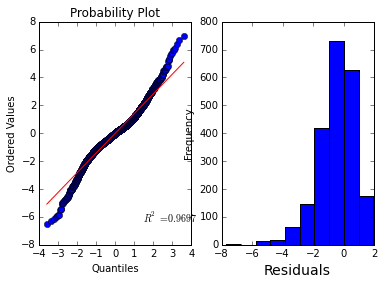

In [186]:
m4 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data=df)
fitted = m4.fit(cov_type='HC1')
print fitted.summary()

plt.figure()
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [187]:
m5 = smf.ols('ceb ~ age + educ +  idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=df)
fitted = m5.fit(cov_type='HC1')
print fitted.summary()
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Wed, 22 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:58:45   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [188]:
#12ая ответ 0.4672
print "F=%f, p=%f, k1=%f" % m4.fit(cov_type='HC1').compare_f_test(m5.fit(cov_type='HC1'))

F=0.919236, p=0.467231, k1=5.000000


C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\regression\linear_model.py:1540: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)


In [190]:
m_meh = smf.ols('ceb ~ age + educ +  idlnchld + knowmeth + '\
                    'agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans', 
             data=df)
fitted = m_meh.fit(cov_type='HC1')
print fitted.summary()
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]
print "F=%f, p=%f, k1=%f" % m4.fit(cov_type='HC1').compare_f_test(m_meh.fit(cov_type='HC1'))
print m4.fit(cov_type='HC1').compare_f_test(m_meh.fit(cov_type='HC1'))
#13ая 36

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Wed, 22 Jun 2016   Prob (F-statistic):               0.00
Time:                        15:00:27   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\regression\linear_model.py:1540: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\regression\linear_model.py:1540: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)


# WEEK4 as1

In [2]:
df = pd.read_csv('gene_high_throughput_sequencing.csv')
df.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


In [3]:
df.Diagnosis.unique()

array(['normal', 'early neoplasia', 'cancer'], dtype=object)

In [4]:
df.drop(['Patient_id'], axis = 1, inplace = True)

In [5]:
df_norm = df[df.Diagnosis == 'normal']
df_norm.drop(['Diagnosis'], axis = 1, inplace = True)

df_neop = df[df.Diagnosis == 'early neoplasia']
df_neop.drop(['Diagnosis'], axis = 1, inplace = True)

df_cans = df[df.Diagnosis == 'cancer']
df_cans.drop(['Diagnosis'], axis = 1, inplace = True)

C:\Users\Insaf\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Insaf\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Insaf\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
df_neop.head()

,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,ISG15,AGRN,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
24,2.516305,11.430887,18.506550,13.969049,20.957007,10.374992,8.414330,68.513944,37.622379,62.319268,...,4.488498,1.314098,1.314098,1.314098,3.307073,1.314098,25.059902,1.314098,1.314098,1.314098
25,1.937270,9.686352,23.541357,15.295034,18.815807,11.128772,9.155183,67.951908,51.729112,62.425015,...,3.709591,1.937270,1.937270,1.937270,1.937270,1.937270,26.349727,1.937270,1.937270,1.937270
26,1.405858,15.119783,17.985461,17.237294,21.824785,4.801919,5.796501,67.064975,33.298362,58.412228,...,7.029290,1.405858,1.405858,1.405858,1.405858,1.405858,29.254009,1.405858,1.405858,1.405858
27,2.131757,8.789458,12.731187,6.395270,19.185811,14.922297,4.082003,52.028259,43.670673,57.028643,...,9.453726,2.131757,2.131757,2.131757,2.131757,2.131757,23.189490,2.131757,2.131757,2.131757
28,2.421766,7.830416,18.283935,15.229320,29.234970,15.779540,8.098199,50.224123,42.944858,68.447282,...,5.976863,1.264726,1.264726,1.264726,1.264726,1.264726,19.849890,1.264726,1.264726,1.264726


In [7]:
pvalues1 = scipy.stats.ttest_ind(df_norm, df_neop, equal_var = False).pvalue
pvalues2 = scipy.stats.ttest_ind(df_neop, df_cans, equal_var = False).pvalue

In [8]:
#1
alpha = 0.05
num1 = 0
num2 = 0
for i in pvalues1:
    if i < alpha:
        num1 = num1 + 1
    
for i in pvalues2:
    if i < alpha:
        num2 = num2 + 1
print num1, num2, num1 + num2

1575 3490 5065


In [9]:
#2  fold change > 1.5.
import statsmodels.stats.multitest as smm

alpha = 0.05/2
reject1, p_corrected1, a1, a2 =   smm.multipletests(pvalues1, alpha = alpha, method = 'holm')
reject2, p_corrected2, a1_2, a2_2 =   smm.multipletests(pvalues2, alpha = alpha, method = 'holm')

# reject, p_corrected, a1, a2 = multipletests(sales_correlation.p, 
#                                             alpha = 0.05, 
#                                             method = 'holm') 

In [15]:
def fold_change(C, T):
    if T > C:
        return 1.*T/C
    if C > T:
        return 1.*C/T
    else:
        return 0

fold_change(1,6)

6.0

In [34]:
num1 = 0
for id, p_corrected  in enumerate(p_corrected1):
    if (p_corrected  < 0.025) and (fold_change(df_norm[[id]].mean(axis = 0)[0], df_neop[[id]].mean(axis = 0)[0]) > 1.5):
        num1 = num1 +  1
print num1

2


In [35]:
num2 = 0
for id, val in enumerate(p_corrected2):
    if (val < 0.025) and (fold_change(df_neop[[id]].mean(axis = 0)[0], df_cans[[id]].mean(axis = 0)[0]) > 1.5):
        num2 = num2 +  1
print num2

77


In [20]:
fold_change(df_norm[[0]].mean(axis = 0)[0], df_neop[[0]].mean(axis = 0)[0]) 

1.0678576234378034

In [23]:
df_cans.shape

(23, 15748)

In [36]:
alpha = 0.05/2
reject1, p_corrected1, a1, a2 =   smm.multipletests(pvalues1, alpha = alpha, method = 'fdr_bh')
reject2, p_corrected2, a1_2, a2_2 =   smm.multipletests(pvalues2, alpha = alpha, method = 'fdr_bh')

num1 = 0
for id, p_corrected  in enumerate(p_corrected1):
    if (p_corrected  < 0.025) and (fold_change(df_norm[[id]].mean(axis = 0)[0], df_neop[[id]].mean(axis = 0)[0]) > 1.5):
        num1 = num1 +  1
print num1

num2 = 0
for id, val in enumerate(p_corrected2):
    if (val < 0.025) and (fold_change(df_neop[[id]].mean(axis = 0)[0], df_cans[[id]].mean(axis = 0)[0]) > 1.5):
        num2 = num2 +  1
print num2

4
524


# WEEK 4 as2

In [ ]:
state — штат США
account_length — длительность использования аккаунта
area_code — деление пользователей на псевдорегионы, использующееся в телекоме
intl_plan — подключена ли у пользователя услуга международного общения
vmail_plan — подключена ли у пользователя услуга голосовых сообщений
vmail_message — количество голосых сообщений, который пользователь отправил / принял
day_calls — сколько пользователь совершил дневных звонков
day_mins — сколько пользователь проговорил минут в течение дня
day_charge — сколько пользователь заплатил за свою дневную активность
eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
custserv_calls — сколько раз пользователь позвонил в службу поддержки
treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
mes_estim — оценка интенсивности пользования интернет мессенджерами
churn — результат оттока: перестал ли абонент пользоваться услугами оператора

In [3]:
df = pd.read_csv('churn_analysis.csv')
df.head()

NameError: name 'pd' is not defined